## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
mouse_metadata.sort_values(by=["Mouse ID"])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
49,a203,Infubinol,Female,20,23
50,a251,Infubinol,Female,21,25
51,a262,Placebo,Female,17,29
52,a275,Ceftamin,Female,20,28
53,a366,Stelasyn,Female,16,29
...,...,...,...,...,...
245,z435,Propriva,Female,12,26
8,z578,Ramicane,Male,11,16
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results.sort_values(by=["Mouse ID"])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
113,a203,0,45.000000,0
389,a203,5,48.508468,0
1295,a203,25,56.793208,1
1675,a203,40,63.593490,2
1577,a203,35,61.931650,2
...,...,...,...,...
1143,z969,25,63.145652,2
1076,z969,20,57.898778,2
301,z969,5,49.332999,0
1529,z969,35,69.176246,4


In [4]:
# Combine the data into a single dataset
lush = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
lush

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
nummice = lush["Mouse ID"].nunique()
print(f"there were {nummice} mice in the experiment.")

there were 249 mice in the experiment.


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice = lush.loc[lush.duplicated(subset=["Mouse ID", "Timepoint"], keep=False), :]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_metadata.loc[mouse_metadata["Mouse ID"] == "g989", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_lush = lush.loc[lush["Mouse ID"] != "g989", :]
clean_lush

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
nummice = clean_lush["Mouse ID"].nunique()
print(f"There were {nummice} mice in the experiment, post-cleaning.")

There were 248 mice in the experiment, post-cleaning.


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the  tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean = clean_lush.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = clean_lush.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_var = clean_lush.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_sigma = clean_lush.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = clean_lush.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


summary_df = pd.DataFrame({
    "Mean": tumor_mean,
    "Median": tumor_median,
    "Variance": tumor_var,
    "Standard Deviation": tumor_sigma,
    "SEM":tumor_sem
})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = clean_lush.groupby("Drug Regimen").agg(mean = ('Tumor Volume (mm3)', 'mean'), 
                                                    median = ('Tumor Volume (mm3)', 'median'),
                                                    var = ('Tumor Volume (mm3)', 'var'),
                                                    std = ('Tumor Volume (mm3)', 'std'),
                                                    sem = ('Tumor Volume (mm3)', 'sem')
                                                    ).round(2)
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [12]:
timepoint_totals = clean_lush.groupby(["Drug Regimen"]).sum()["Timepoint"]
timepoint_totals

Drug Regimen
Capomulin    4960
Ceftamin     3515
Infubinol    3235
Ketapril     3705
Naftisol     3650
Placebo      3380
Propriva     2525
Ramicane     4885
Stelasyn     3480
Zoniferol    3525
Name: Timepoint, dtype: int64

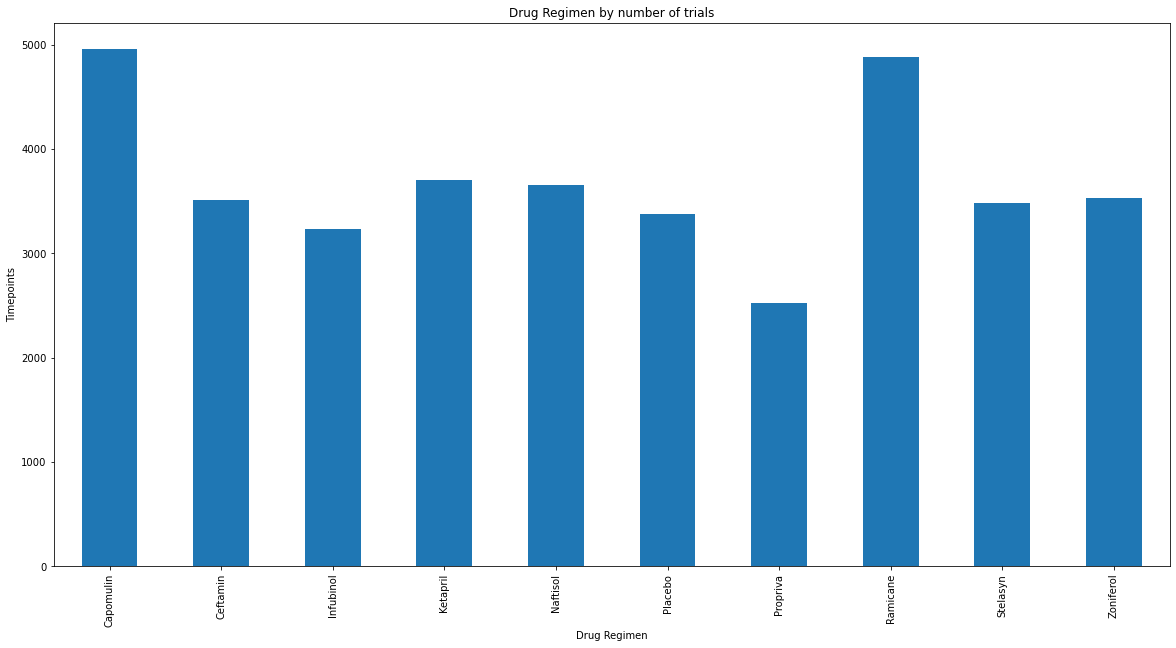

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_totals.plot(kind="bar", figsize=(20,10), ylabel="Timepoints")
plt.title("Drug Regimen by number of trials")
plt.show()
plt.tight_layout()


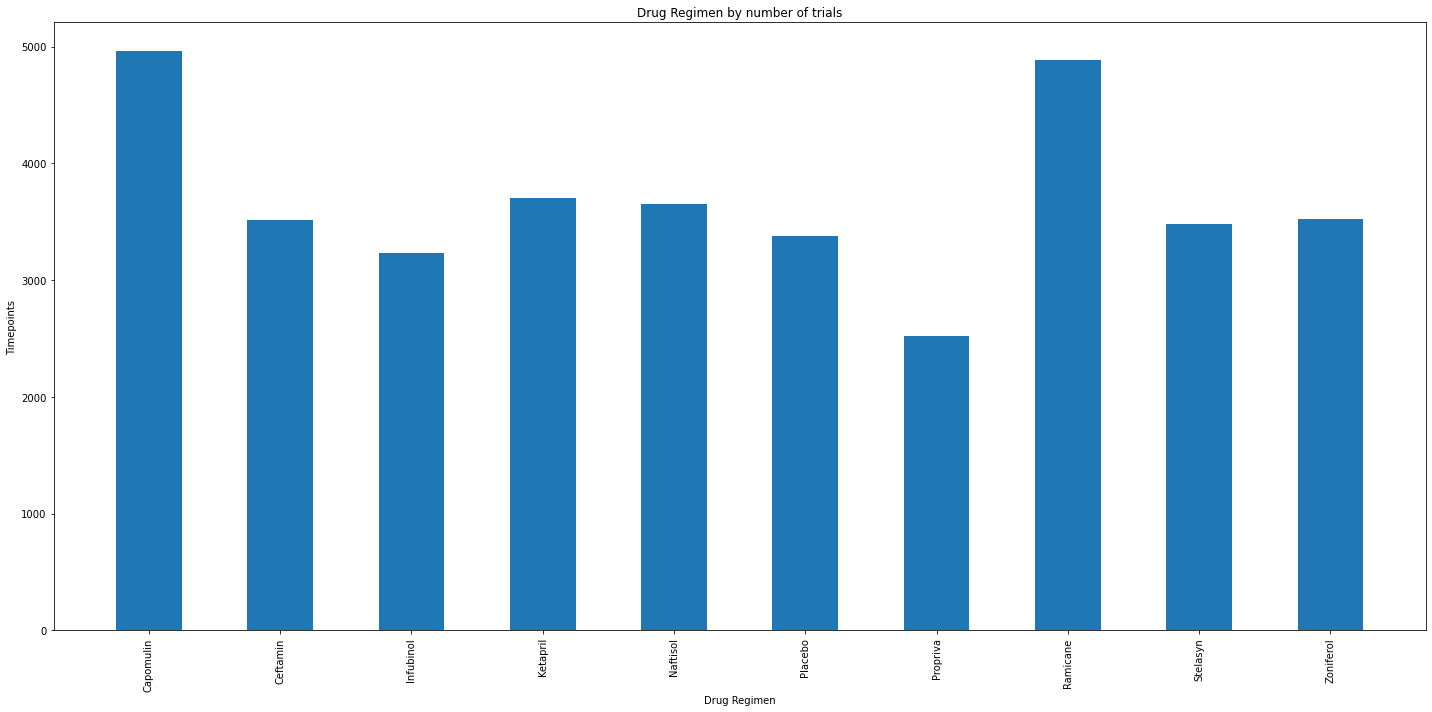

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoint_totals_index = timepoint_totals.reset_index()
timepoint_totals_index



# Set x axis and tick locations
x_axis = np.arange(len(timepoint_totals_index))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.bar(x_axis, timepoint_totals_index["Timepoint"],width=0.5,  align="center")
plt.xticks(tick_locations, timepoint_totals_index["Drug Regimen"], rotation="vertical")

# Set x and y limits

# Set a Title and labels
plt.title("Drug Regimen by number of trials")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

# Save our graph and show the grap
plt.tight_layout()
#plt.savefig("../Images/avg_state_rain.png")
plt.show()

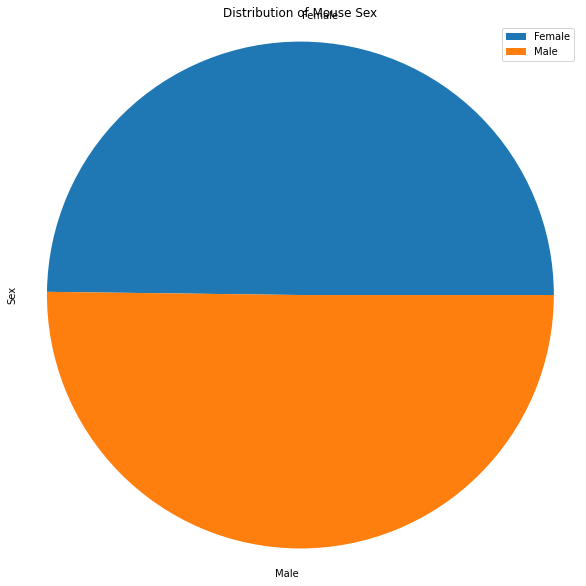

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_sex = mouse_metadata.groupby(["Sex"]).count()
mouse_sex

sexpie = mouse_sex.plot(kind="pie", y='Mouse ID', title=("Distribution of Mouse Sex"), figsize=(10, 10))
sexpie.set_ylabel("Sex")

plt.axis("equal")
plt.show()

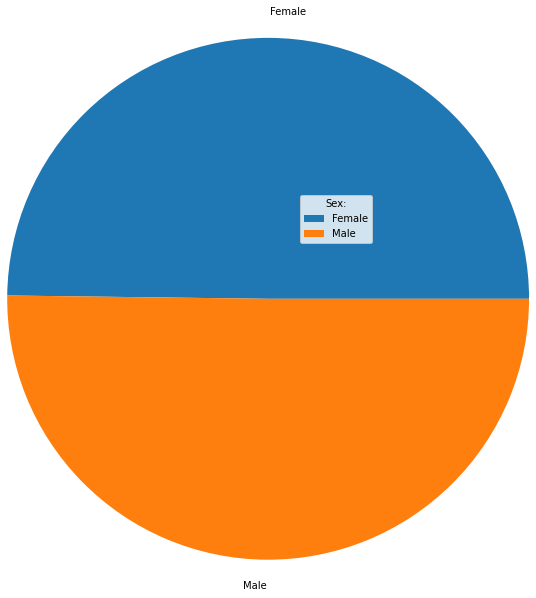

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_sex_index = mouse_sex.reset_index()

plt.pie(mouse_sex_index["Mouse ID"], labels=mouse_sex_index["Sex"], radius = 3)

plt.legend(title = "Sex:")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

top_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

capomulin = clean_lush.loc[((clean_lush["Drug Regimen"] == "Capomulin" ))]
capomulin = capomulin.groupby(["Mouse ID"], as_index=False).last()
capomulin.sort_values(by="Tumor Volume (mm3)")

# Start by getting the last (greatest) timepoint for each mouse



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
16,s185,Capomulin,Female,3,17,45,23.343598,1
11,m601,Capomulin,Male,22,17,45,28.430964,1
23,x401,Capomulin,Female,16,15,45,28.484033,0
2,f966,Capomulin,Male,16,17,20,30.485985,0
19,u364,Capomulin,Male,18,17,45,31.023923,3
24,y793,Capomulin,Male,17,17,45,31.896238,2
14,r554,Capomulin,Female,8,17,45,32.377357,3
12,m957,Capomulin,Female,3,19,45,33.329098,1
18,t565,Capomulin,Female,20,17,45,34.455298,0
22,w914,Capomulin,Male,24,21,45,36.041047,2


In [18]:
ramicane = clean_lush.loc[((clean_lush["Drug Regimen"] == "Ramicane"))]
ramicane = ramicane.groupby(["Mouse ID"], as_index=False).last()
ramicane.sort_values(by="Tumor Volume (mm3)")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
13,k403,Ramicane,Male,21,16,45,22.050126,1
8,g791,Ramicane,Male,11,16,45,29.128472,1
20,s508,Ramicane,Male,1,17,45,30.276232,0
14,m546,Ramicane,Male,18,16,45,30.564625,1
24,z578,Ramicane,Male,11,16,45,30.638696,0
15,n364,Ramicane,Male,4,17,45,31.095335,1
11,j913,Ramicane,Female,4,17,45,31.560470,1
3,a644,Ramicane,Female,7,17,45,32.978522,1
5,c758,Ramicane,Male,9,17,45,33.397653,1
9,i177,Ramicane,Male,10,18,45,33.562402,3


In [19]:
infubinol = clean_lush.loc[((clean_lush["Drug Regimen"] == "Infubinol"))]
infubinol = infubinol.groupby(["Mouse ID"], as_index=False).last()
infubinol.sort_values(by="Tumor Volume (mm3)")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
5,c326,Infubinol,Female,18,25,5,36.321346,0
15,o813,Infubinol,Male,24,28,5,45.699331,0
18,v339,Infubinol,Male,20,26,5,46.250112,0
12,m756,Infubinol,Male,19,30,5,47.010364,1
21,w193,Infubinol,Male,22,30,20,50.005138,0
20,v766,Infubinol,Male,16,27,15,51.542431,1
19,v719,Infubinol,Female,17,30,20,54.048608,1
16,q132,Infubinol,Female,1,30,30,54.656549,4
14,o809,Infubinol,Male,3,25,35,55.629428,1
17,s121,Infubinol,Male,23,26,25,55.650681,2


In [20]:
ceftamin = clean_lush.loc[((clean_lush["Drug Regimen"] == "Ceftamin"))]
ceftamin = ceftamin.groupby(["Mouse ID"], as_index=False).last()
ceftamin.sort_values(by="Tumor Volume (mm3)")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x226,Ceftamin,Male,23,28,0,45.000000,0
1,b447,Ceftamin,Male,2,30,0,45.000000,0
18,u153,Ceftamin,Female,11,25,0,45.000000,0
16,t573,Ceftamin,Female,15,27,0,45.000000,0
10,l558,Ceftamin,Female,13,30,10,46.784535,0
5,h531,Ceftamin,Male,5,27,5,47.784682,0
4,f436,Ceftamin,Female,3,25,15,48.722078,2
17,u149,Ceftamin,Male,24,29,25,52.925348,0
3,b759,Ceftamin,Female,12,25,30,55.742829,1
2,b487,Ceftamin,Female,6,28,25,56.057749,1


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [capomulin, ramicane, infubinol, ceftamin]


# Create empty list to fill with tumor vol data (for plotting)
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    quartiles = drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    x = drug.loc[drug["Tumor Volume (mm3)"] < (lowerq - iqr*1.5)]
    if len(x) > 0:
        outliers.append(x["Mouse ID"])
    # Locate the rows which contain mice on each drug and get the tumor volumes
print(f"there are {len(outliers)} outliers in the data: {outliers}")
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

there are 1 outliers in the data: [5    c326
Name: Mouse ID, dtype: object]


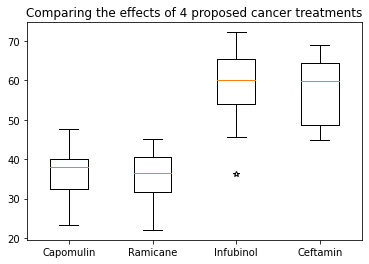

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = capomulin["Tumor Volume (mm3)"], ramicane["Tumor Volume (mm3)"], infubinol["Tumor Volume (mm3)"], ceftamin["Tumor Volume (mm3)"]
fig, ax = plt.subplots()
ax.set_title('Comparing the effects of 4 proposed cancer treatments')
ax.boxplot(data, labels = top_drugs, sym="*")
ax.labels = "shite"
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
